# Goodreads
Progetto per il corso di Big Data, anno accademico 2021/22<br>
<br>
**Autore**: Yuqi Sun<br>
yuqi.sun@studio.unibo.it<br>
1005091

**Fonte**:<br>
*Mengting Wan*, *Julian McAuley*, "Item Recommendation on Monotonic Behavior Chains" (RecSys'18) <br>
*Mengting Wan*, *Rishabh Misra*, *Ndapa Nakashole*, *Julian McAuley*, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora" (ACL'19)

## Descrizione del dataset
Goodreads è un social network americano dedicato ai libri creato nel gennaio 2007 e permette agli utenti di cercare libri, lasciare un giudizio da 1 a 5 stelle, scrivere recensioni, commentare le recensioni altrui, tenere traccia dei libri letti e molte altre funzionalità. I dataset di Goodreads usati in questo progetto sono stati ottenuti dal seguente [sito](https://sites.google.com/eng.ucsd.edu/ucsdbookgraph) e memorizzano le informazioni riguardanti:
- i libri e le serie;
- gli autori;
- le interazioni tra utenti e libri.

Poiché il dataset riguardanti i libri e gli autori era in formato JSON, questi sono stati convertiti in csv.

### Libri
Il file *goodreads_books.csv* contiene i seguenti dati:
- `work_id`: l'id univoco del libro;
- `book_id`: l'id dell'edizione del libro;
- `title`: titolo del libro;
- `title_without_series`: titolo del libro senza il nome della serie;
- `series`: eventuali id della serie a cui appartiene il libro;
- `ratings_count`: numero di rating ottenuti;
- `average_rating`: rating medio;
- `similar_books`: lista di `book_id` dei libri simili;
- `country_code`: nazione del libro in codice (US, IT etc...);
- `language_code`: linguaggio del libro in codice (eng, ita...);
- `edition_information`: informazioni riguardanti l'edizione (Modern Library Classics, Penguin Classics...);
- `format`: formato dell'edizione (hardcover, paperback, kindle...);
- `is_ebook`: booleano indicante se è un ebook o meno;
- `num_pages`: numero di pagine;
- `publication_day`: giorno di pubblicazione;
- `publication_month`: mese di pubblicazione;
- `publication_year`: anno di pubblicazione;
- `publisher`: casa editrice;
- `text_reviews_count`: numero di recensioni scritte.

Poiché in origine nel file JSON l'autore del libro era un array formato da due valori {`author_id`, `role`}, per semplicità è stato generato un ulteriore file *book_author_map.csv* che mappa da `book_id` a `author_id` e `role`, effettuando un'esplosione della struttura dati. Inoltre, il campo `format` presentava molti errori di battitura e molti sinonimi indicanti lo stesso formato e sono stati quindi modificati con Tableau Prep Builder.

### Serie
Il file *goodreads_book_series.csv* contiene i seguenti campi:
- `series_id`: id della serie;
- `title`: titolo della serie;
- `numbered`: indica se la serie è numerata o meno;
- `primary_work_count`: numero di libri contenuti nella serie;
- `series_works_count`: numero totale di libri contenuti nella seria.

In `series_works_count` vengono inclusi anche eventuali edizioni speciali, prequels, spin-off etc. Ad esempio, la serie *Harry Potter* è composta da 7 libri principali, ma ha 18 libri in totale in quanto *Goodreads* include il libro prequel, la versione teatrale e varie collezioni speciali.

### Autori
Il file *goodreads_book_authors.csv* contiene i seguenti campi:
- `author_id`: l'id dell'autore;
- `name`: nome dell'autore;
- `average_rating`: rating medio ricevuto;
- `ratings_count`: numero di ratings ricevuti;
- `text_reviews_count`: numero di recensioni ricevute.

### User-Book Interactions
Il file *goodreads_interactions.csv* contiene i seguenti campi:
- `user_id`: l'id dell'utente;
- `book_id`: l'id del libro;
- `is_read`: booleano che indica se il libro è stato letto o meno;
- `rating`: il rating dato dall'utente, compreso tra 0-5;
- `is_reviewed`: booleano che indica se l'utente ha lasciato una recensione o meno.

Poiché il file CSV originale non usa gli stessi `book_id` usati nel file *goodreads_books.csv* è stato caricato anche il file *book_id_map.csv*, che mappa da `book_id` delle interazioni al `book_id` dei libri.

## Preparazione dei dati

Si configura il kernel Spark e si definiscono i percorsi dei vari file salvati sul servizio "Amazon S3", avviando così una nuova applicazione Spark.

In [1]:
%%configure -f
{
    "executorMemory": "8G", 
    "numExecutors": 2, 
    "executorCores": 3, 
    "conf": {
        "spark.dynamicAllocation.enabled": "false"
    }
}

In [2]:
val bucketName = "unibo-bd2122-ysun15/goodreads"

val pathBookDataset = s"s3a://$bucketName/goodreads_books.csv"
val pathSeriesDataset = s"s3a://$bucketName/goodreads_book_series.csv"
val pathAuthorsDataset = s"s3://$bucketName/goodreads_book_authors.csv"
val pathInteractionsDataset = s"s3a://$bucketName/goodreads_interactions.csv"
val pathBookIdMapDataset = s"s3a://$bucketName/book_id_map.csv"
val pathBookAuthorMapDataset = s"s3a://$bucketName/book_author_map.csv"

"SPARK UI: Enable forwarding of port 20888 and connect to http://localhost:20888/proxy/" + sc.applicationId + "/"

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1663762989991_0001,spark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bucketName: String = unibo-bd2122-ysun15/goodreads
pathBookDataset: String = s3a://unibo-bd2122-ysun15/goodreads/goodreads_books.csv
pathSeriesDataset: String = s3a://unibo-bd2122-ysun15/goodreads/goodreads_book_series.csv
pathAuthorsDataset: String = s3://unibo-bd2122-ysun15/goodreads/goodreads_book_authors.csv
pathInteractionsDataset: String = s3a://unibo-bd2122-ysun15/goodreads/goodreads_interactions.csv
pathBookIdMapDataset: String = s3a://unibo-bd2122-ysun15/goodreads/book_id_map.csv
pathBookAuthorMapDataset: String = s3a://unibo-bd2122-ysun15/goodreads/book_author_map.csv
res3: String = SPARK UI: Enable forwarding of port 20888 and connect to http://localhost:20888/proxy/application_1663762989991_0001/


Si effettua quindi il parsing dei dati e la costruzione degli RDD.

Per i libri, si rimuovono i campi `edition_information`, `publication_day`, `publication_month` e `publisher`, in quanto sono informazioni non utili per le analisi successive. Per essere valido, un record deve avere un `book_id`, un `work_id` e un `title`; i rimanenti campi sono opzionali e quindi sono stati memorizzati come *Option* oppure usando valori di default.

Es:
- un libro che non fa parte di una serie avrà nel campo `titleWithoutSeries` un valore *None*;
- un libro avrà 0 `ratingsCount` indifferentemente dal fatto che nel dataset il dato sia effettivamente 0 o mancante;

In [3]:
import scala.util.Try

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

import scala.util.Try


In [4]:
case class BookData(
  workId: Long,
  bookId: Long,
  title: String,
  titleWithoutSeries: Option[String],
  series: Option[String],
  ratingsCount: Long,
  averageRating: Double,
  similarBooks: Option[String],
  countryCode: Option[String],
  languageCode: Option[String],
  workFormat: Option[String],
  isEbook: Option[Boolean],
  numPages: Option[Long],
  publicationYear: Option[Long],
  textReviewsCount: Long
)

object BookData {
  def apply(line:String): Option[BookData] = {
    try {
      val emptyList: List[Long] = List()
      val row = line.split(",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)")
      val bookId:Long = row(0).toLong
      val workId:Long = row(1).toLong
      val title:String = row(2)
      val titleWithoutSeries:Option[String] = Try(Some(row(3))).getOrElse(None)
      val series:Option[String] = Try(
          Some(row(4))
      ).getOrElse(None)
        
      val ratingsCount: Long = Try(row(5).toLong).getOrElse(0)
      val averageRating: Double = Try(row(6).toDouble).getOrElse(0)
      val similarBooks: Option[String] = Try(
          Some(row(7))
      ).getOrElse(None)
      val countryCode: Option[String] = Try(Some(row(8))).getOrElse(None)
      val languageCode: Option[String] = Try(Some(row(9))).getOrElse(None)
      val workFormat: Option[String] = Try(Some(row(11))).getOrElse(None)
      val isEbook: Option[Boolean] = Try(Some(row(12).toBoolean)).getOrElse(None)
      val numPages: Option[Long] = Try(Some(row(13).toLong)).getOrElse(None)
      val publicationYear: Option[Long] = Try(Some(row(16).toLong)).getOrElse(None)
      val textReviewsCount: Long = Try(row(18).toLong).getOrElse(0)
      Some(new BookData(
        bookId,
        workId,
        title,
        titleWithoutSeries,
        series,
        ratingsCount,
        averageRating,
        similarBooks,
        countryCode,
        languageCode,
        workFormat,
        isEbook,
        numPages,
        publicationYear,
        textReviewsCount
      ))       
    } catch {
      case _: Exception => None
    }
  }
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class BookData
defined object BookData
Companions must be defined together; you may wish to use :paste mode for this.


Per le serie, si rimuovono i campi `description` e `note`.

In [5]:
case class SeriesData(
  seriesId: Long,
  title: String,
  isNumbered: Boolean,
  primaryWorkCount: Int,
  totalWorkCount:Int
)

object SeriesData{
  def apply(line: String): Option[SeriesData] = {
    try {
      val row = line.split(",").map(_.replaceAll("\"",""))  
      val seriesId: Long = row(0).toLong
      val title: String = row(1)
      val isNumbered: Boolean = row(2).toBoolean
      val primaryWorkCount: Int = row(3).toInt
      val totalWorkCount:Int = row(4).toInt

      Some(new SeriesData(seriesId, title, isNumbered, primaryWorkCount, totalWorkCount))
    } catch {
      case e: Exception => None
    }
  }
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class SeriesData
defined object SeriesData
Companions must be defined together; you may wish to use :paste mode for this.


In [6]:
case class AuthorData(
  authorId: Long,
  name: String,
  averageRating: Double,
  ratingsCount: Long,
  textReviewsCount: Long
)

object AuthorData {
  def apply(line: String): Option[AuthorData] = {
    try {
      val row = line.split(",").map(_.replaceAll("\"",""))
      val authorId: Long = row(0).toLong
      val name: String = row(2)
      val averageRating: Double = row(1).toDouble
      val ratingsCount: Long = row(3).toLong
      val textReviewsCount: Long = row(4).toLong

      Some(new AuthorData(authorId, name, averageRating, ratingsCount, textReviewsCount))   
    } catch {
      case e: Exception => None
    }
  }
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class AuthorData
defined object AuthorData
Companions must be defined together; you may wish to use :paste mode for this.


In [7]:
case class InteractionData(
  userId: Long,
  bookId: Long,
  isRead: Int,
  rating: Int,
  isReviewed: Int
)

object InteractionData {
  def apply(line: String): Option[InteractionData] = {
    try {
      val row = line.split(",").map(_.replaceAll("\"",""))
      val userId: Long = row(0).toLong
      val bookId: Long = row(1).toLong
      val isRead: Int = row(2).toInt
      val rating: Int = row(3).toInt
      val isReviewed: Int = row(4).toInt
        
      Some(new InteractionData(userId, bookId, isRead, rating, isReviewed))
    } catch {
      case e: Exception => None
    }
  }    
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class InteractionData
defined object InteractionData
Companions must be defined together; you may wish to use :paste mode for this.


In [8]:
case class BookAuthorData(
  bookId: Long,
  authorId: Long,
  role: String
)

object BookAuthorData {
  def apply(line: String): Option[BookAuthorData] = {
    try {
      val row = line.split(",").map(_.replaceAll("\"",""))
      val bookId: Long = row(0).toLong
      val authorId: Long = row(1).toLong
      val role: String = row(2)

      Some(new BookAuthorData(bookId, authorId, role))
    } catch {
      case e: Exception => None
    }
  }
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class BookAuthorData
defined object BookAuthorData
Companions must be defined together; you may wish to use :paste mode for this.


In [9]:
case class BookIdData(
  bookIdInteraction: Long,
  bookId: Long
)

object BookIdData {
  def apply(line: String): Option[BookIdData] = {
    try {
      val row = line.split(",").map(_.replaceAll("\"",""))
      val bookIdInteraction: Long = row(0).toLong
      val bookId: Long = row(1).toLong

      Some(new BookIdData(bookIdInteraction, bookId))
        
    } catch {
      case e: Exception => None
    }
  }
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

defined class BookIdData
defined object BookIdData
Companions must be defined together; you may wish to use :paste mode for this.


In [10]:
val bookRDD = sc.textFile(pathBookDataset)
val seriesRDD = sc.textFile(pathSeriesDataset)
val authorsRDD = sc.textFile(pathAuthorsDataset)
val interactionsRDD = sc.textFile(pathInteractionsDataset)
val bookIdMapRDD = sc.textFile(pathBookIdMapDataset)
val bookAuthorMapRDD = sc.textFile(pathBookAuthorMapDataset)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bookRDD: org.apache.spark.rdd.RDD[String] = s3a://unibo-bd2122-ysun15/goodreads/goodreads_books.csv MapPartitionsRDD[1] at textFile at <console>:25
seriesRDD: org.apache.spark.rdd.RDD[String] = s3a://unibo-bd2122-ysun15/goodreads/goodreads_book_series.csv MapPartitionsRDD[3] at textFile at <console>:25
authorsRDD: org.apache.spark.rdd.RDD[String] = s3://unibo-bd2122-ysun15/goodreads/goodreads_book_authors.csv MapPartitionsRDD[5] at textFile at <console>:25
interactionsRDD: org.apache.spark.rdd.RDD[String] = s3a://unibo-bd2122-ysun15/goodreads/goodreads_interactions.csv MapPartitionsRDD[7] at textFile at <console>:25
bookIdMapRDD: org.apache.spark.rdd.RDD[String] = s3a://unibo-bd2122-ysun15/goodreads/book_id_map.csv MapPartitionsRDD[9] at textFile at <console>:25
bookAuthorMapRDD: org.apache.spark.rdd.RDD[String] = s3a://unibo-bd2122-ysun15/goodreads/book_author_map.csv MapPartitionsRDD[11] at textFile at <console>:25


In [11]:
val parsedBooks = bookRDD.map(BookData(_)).filter(_.isDefined).map(_.get)
val parsedSeries = seriesRDD.map(SeriesData(_)).filter(_.isDefined).map(_.get)
val parsedAuthors = authorsRDD.map(AuthorData(_)).filter(_.isDefined).map(_.get)
val parsedBookAuthorMap = bookAuthorMapRDD.map(BookAuthorData(_)).filter(_.isDefined).map(_.get)
val parsedBookIdMap = bookIdMapRDD.map(BookIdData(_)).filter(_.isDefined).map(_.get)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

parsedBooks: org.apache.spark.rdd.RDD[BookData] = MapPartitionsRDD[14] at map at <console>:25
parsedSeries: org.apache.spark.rdd.RDD[SeriesData] = MapPartitionsRDD[17] at map at <console>:25
parsedAuthors: org.apache.spark.rdd.RDD[AuthorData] = MapPartitionsRDD[20] at map at <console>:25
parsedBookAuthorMap: org.apache.spark.rdd.RDD[BookAuthorData] = MapPartitionsRDD[23] at map at <console>:25
parsedBookIdMap: org.apache.spark.rdd.RDD[BookIdData] = MapPartitionsRDD[26] at map at <console>:25


## Analisi conoscitiva

### Libri

Essendo Goodreads un social network nato in America, vogliamo effettuare un'analisi conoscitiva del dataset dei libri in termini di:
- nazione (`countryCode`);
- lingua (`languageCode`);
- formato (`format`).

Poiché riutilizzeremo più volte l'RDD dei libri, effettuiamo un'operazione di *cache()*.

In [12]:
val books = parsedBooks.cache()
val booksSize = books.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

books: parsedBooks.type = MapPartitionsRDD[14] at map at <console>:25
booksSize: Long = 2360131


In totale ci sono `2360131` record validi di libro, pari a 1789.5 MiB.

#### Percentuale di nazioni presenti

In [13]:
val countryCount = books.filter(b => b.countryCode.isDefined).
  map(b => (b.countryCode.get, 1)).
  reduceByKey(_+_).
  collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

countryCount: Array[(String, Int)] = Array((US,2360131))


Su 2360131 record validi, ognuno di questi è salvato con `US` come nazione, benché nel dataset siano presenti molti libri in lingua non-inglese scritti da autori non-americani. Si pensava che `countryCode` indicasse la nazione d'origine dell'autore oppure quella dove è stata stampata l'edizione, ma la query successiva conferma la presenza di edizioni non in lingua inglese da un autore non americano: versioni in lingue diverse della Divina Commedia sono tutte comunque salvate con `US`. Non è quindi chiaro il significato del campo `countryCode`.

In [14]:
/*
Instead of doing multiple join between the books, authors and bookAuthorMap RDDs, since we're only searching for Dante novels,
we'll first find Dante's author ID, and then we'll filter the bookAuthorMap considering only those bookId whose authorId is
Dante's. We'll then join it with books.
*/

val danteAlighieriVar = parsedAuthors.filter(a => a.name == "Dante Alighieri").map(a => (a.authorId, a.name)).collect
val danteAlighieriBooks = sc.broadcast(parsedBookAuthorMap.filter(x => x.authorId == danteAlighieriVar(0)._1)
                                       .map(x => (x.bookId, "Dante Alighieri")).collectAsMap)

val danteBooksId = books.
  map(b => (danteAlighieriBooks.value.get(b.bookId), (b.title, b.countryCode.get, b.languageCode.get))).
  filter(b => b._1.isDefined && !b._2._3.startsWith("en") && b._2._3 != "").
  take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

danteAlighieriVar: Array[(Long, String)] = Array((5031312,Dante Alighieri))
danteAlighieriBooks: org.apache.spark.broadcast.Broadcast[scala.collection.Map[Long,String]] = Broadcast(11)
danteBooksId: Array[(Option[String], (String, String, String))] = Array((Some(Dante Alighieri),(????????? ??????? - ??????,US,ara)), (Some(Dante Alighieri),(????????? ??????? - ??????,US,ara)), (Some(Dante Alighieri),(????????? ???????,US,ara)), (Some(Dante Alighieri),(????????? ??????? - ??????,US,ara)), (Some(Dante Alighieri),(????????? ???????,US,ara)), (Some(Dante Alighieri),(????????? ??????? - ??????,US,ara)), (Some(Dante Alighieri),(??????????,US,bul)), (Some(Dante Alighieri),(?????????? ???????,US,bul)), (Some(Dante Alighieri),(Dantes guddommelige komedie,US,dan)), (Some(Dante Alighieri),(La Divina Commedia. Inferno - Vol. I di 6,US,ita)))


#### Percentuale delle lingue

In [15]:
import org.apache.spark.sql.SaveMode
val path = "s3://unibo-bd2122-ysun15/goodreads/output"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

import org.apache.spark.sql.SaveMode
path: String = s3://unibo-bd2122-ysun15/goodreads/output


In [16]:
val languageCount = books.filter(b => b.languageCode.isDefined).
  map(b => (b.languageCode.get, 1)).
  reduceByKey(_+_).
  cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

languageCount: org.apache.spark.rdd.RDD[(String, Int)] = ShuffledRDD[38] at reduceByKey at <console>:27


In [17]:
languageCount.toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/languageCount")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Molti dei record presenti non specificano la lingua del libro, per mancanza stessa del dato o per errore di parsing. Essendo Goodreads un social americano, non è sorprendente che molti dei libri presenti siano in lingua inglese. Da Tableau si vede che è anche presente `Select...`, forse anche questo un possibile errore originario del dataset.

In [18]:
val validLanguagesCount = books.filter(b => b.languageCode.get != "" && b.languageCode.get != "Select...").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

validLanguagesCount: Long = 1300467


In [19]:
languageCount.
  filter({case(k,v) => k != "" && k != "Select..."}).
  map({case (k,v) => (v/validLanguagesCount.toDouble * 100, k)}).
  sortByKey(false).
  take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res14: Array[(Double, String)] = Array((54.476661076367186,eng), (7.0322430326951775,en-US), (4.4874648876134495,en-GB), (4.192109449912993,spa), (3.9139016983898864,ita), (3.3047359140985506,ara), (2.4641148141398435,fre), (2.3788377559753533,ger), (2.0984769317483645,ind), (1.8031983895016173,por))


In [20]:
val totalEnglishCount = languageCount.
  filter({case(k,v) => k.startsWith("en") && k != "enm"}).
  reduce((a, b) => ("totale english", a._2 + b._2))
val totalEnglishPercentage = totalEnglishCount._2/validLanguagesCount.toDouble * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

totalEnglishCount: (String, Int) = (totale english,866140)
totalEnglishPercentage: Double = 66.60222827645761


Escludendo le lingue non valide, l'inglese compone il `66.60%`, mentre le successive 5 lingue più presenti sono:
- spagnolo (4.19%)
- italiano (3.91%)
- arabo (3.30)
- francese (2.46%)
- tedesco (2.38%)

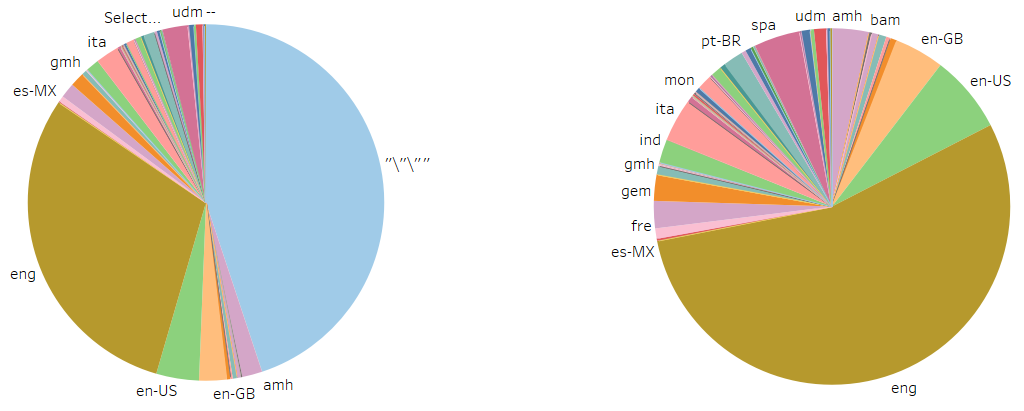

In [21]:
languageCount.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res15: languageCount.type = ShuffledRDD[38] at reduceByKey at <console>:27


#### Percentuale dei formati

In [22]:
val formatsCount = books.filter(b => b.workFormat.isDefined).
  flatMap(b => b.workFormat.get.split(";")).
  map(b => (b.toLowerCase, 1)).
  reduceByKey(_+_).
  cache

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

formatsCount: org.apache.spark.rdd.RDD[(String, Int)] = ShuffledRDD[52] at reduceByKey at <console>:28


In [23]:
formatsCount.toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/formatsCount")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

I valori originali dei formati hanno subito un profondo processo di pulitura che ha purtroppo influenzato la sua precisione. I valori includevano infatti:
- parole straniere di cui non è stata trovata una traduzione affidabile e sono stati quindi sostituiti da un generico `book`;
- dimensioni (altezza, larghezza o solo uno dei due) del libro, anche questi sostituiti con `book`;
- errori di battitura;
- sinonimi per indicare lo stesso formato (es: [paperback](https://en.wikipedia.org/wiki/Paperback) viene chiamato anche `soft cover` o `softback`);
- termini generali come `digital`, `download`, `eletronic`, `pdf`, `mobi` etc sostituiti con `e-book`
- etc...

Al termine del processo, escludendo i campi completamente mancanti, i formati principali presenti su Goodreads sono:
- paperback e mass market paperback;
- hardcover;
- kindle ed e-book. 

In [24]:
val validFormatCount = books.filter(b => b.workFormat.get != "").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

validFormatCount: Long = 1713899


In [25]:
formatsCount.
  filter({case(k,v) => k != ""}).
  map({case (k,v) => (v, k)}).
  sortByKey(false).
  map({case (k, v) => (k/validFormatCount.toDouble * 100, v)}).
  take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res17: Array[(Double, String)] = Array((52.4369288972104,paperback), (21.05369102846784,hardcover), (11.04236597372424,e-book), (7.33228737516038,kindle), (2.468406831441059,mass market paperback), (1.7937463059375145,audio cd), (1.5818901813934194,audiobook), (0.8516837923354876,book), (0.6471209797076724,audible audiobook), (0.328899194176553,board book))


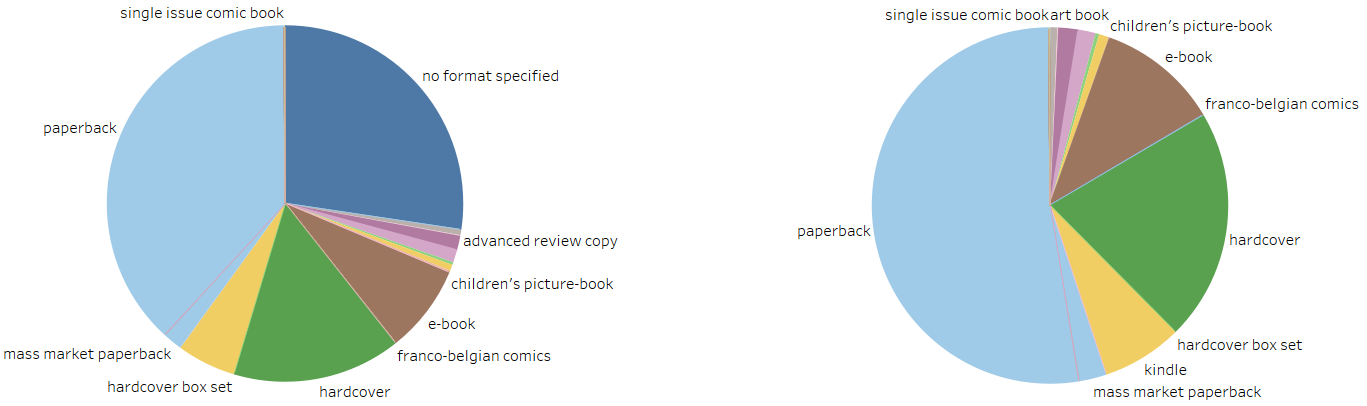

In [26]:
formatsCount.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res18: formatsCount.type = ShuffledRDD[52] at reduceByKey at <console>:28


### Serie

Vogliamo vedere adesso qual è la percentuale di serie presenti su Goodreads rispetto a libri singoli e il numero medio di libri che compongono una serie.

In [27]:
val bookSeries = books.
  filter(b => b.series.isDefined && b.series.get != "")
val bookSeriesCount = bookSeries.count()
val seriesCount = bookSeries.flatMap(b => b.series.get.split(";")).distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bookSeries: org.apache.spark.rdd.RDD[BookData] = MapPartitionsRDD[63] at filter at <console>:26
bookSeriesCount: Long = 674386
seriesCount: Long = 346690


In totale sono presenti `346690` serie. Su `2360131` libri, solo `674386` presentano un valore nel campo `series`, pari al `28,57%`.

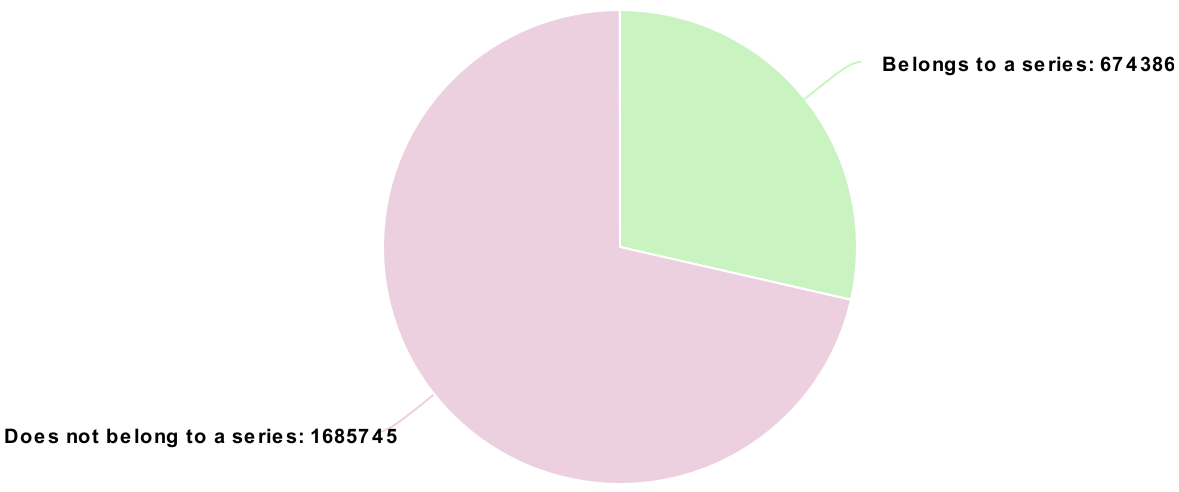

In [28]:
val series = parsedSeries.cache()
val seriesCount = series.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

series: parsedSeries.type = MapPartitionsRDD[17] at map at <console>:25
seriesCount: Long = 392050


Mentre nel dataset *goodreads_books.csv* sono presenti `346690` serie distinte, nel dataset *goodreads_book_series.csv* sono presenti `392050` records.

In [29]:
val numOfWorks = series.
  map(s => {
    if (s.primaryWorkCount == 0) (s.title, s.totalWorkCount)
      else (s.title, s.primaryWorkCount)
    }).
  distinct().
  cache()

val avgNumOfWorks = numOfWorks.reduce((a, b) => ("total num of works", a._2 + b._2))._2 /seriesCount.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

numOfWorks: org.apache.spark.rdd.RDD[(String, Int)] = MapPartitionsRDD[71] at distinct at <console>:26
avgNumOfWorks: Double = 1.4503048080601963


In [30]:
val distinctSeries = numOfWorks.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

distinctSeries: Long = 105800


In [31]:
numOfWorks.toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/numOfSeriesWorkCount")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Se prendiamo in considerazione solo i record distinti per titolo e numero di volumi, il numero di serie passa da `392050` a `105800`. In media, una serie è composta da 1.45 volumi, ma questo dato include anche serie da un numero di volumi estremamente alto. I top tre sono:
- *Images of America: California Series* presenta 890 volumi ed è una raccolta d'immagini di California;
- *The Magazine of Fantasy & Science Fiction* presenta 728 volumi ed è una rivista di narrativa fantasy e fantascienza;
- *Tex* presenta 685 volumi ed è una serie di fumetti.

In realtà la maggior parte delle serie è composta da 1-9 volumi.

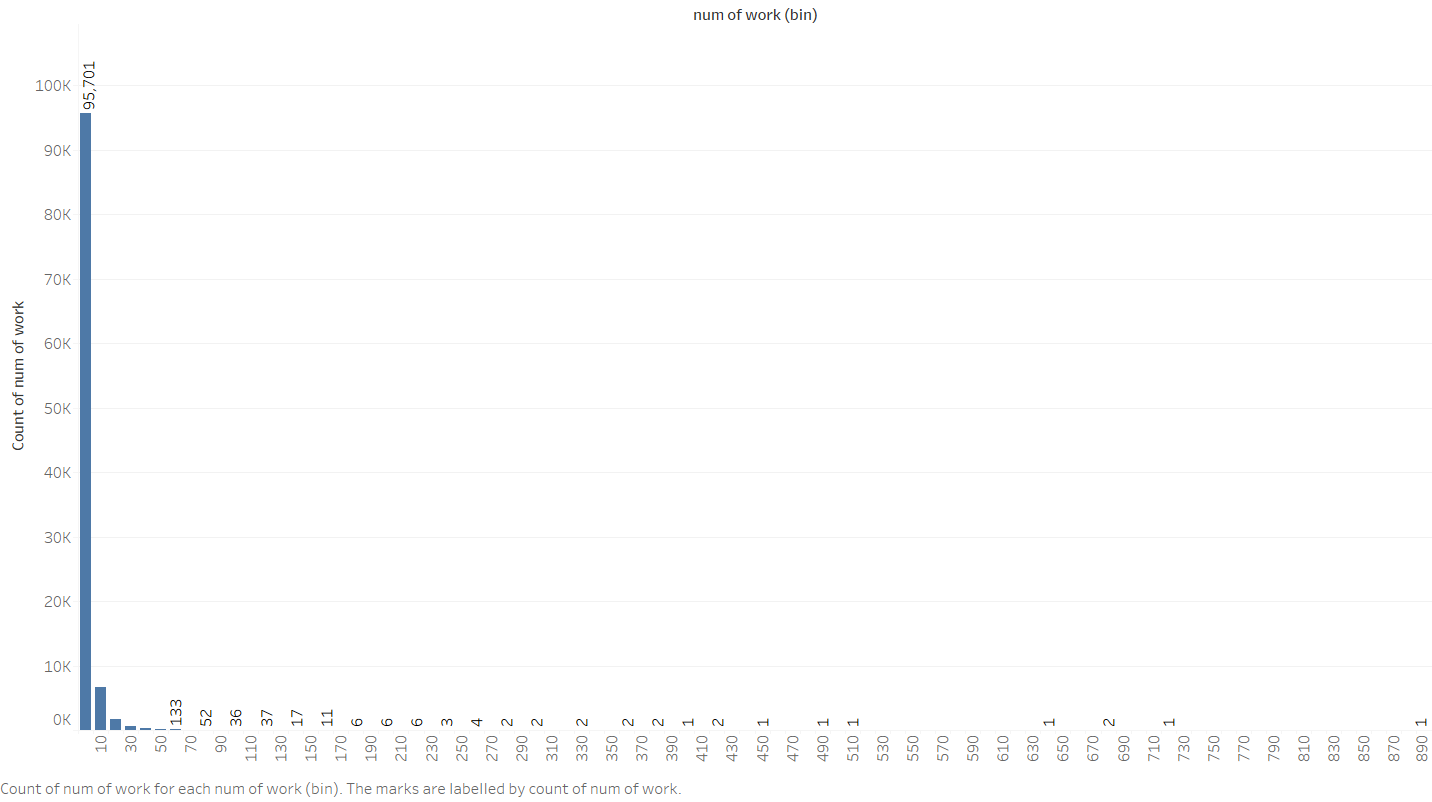

In [32]:
val NumOfWorks15 = numOfWorks.filter(n => n._2 <= 10)
val NumOfWorks15Count = NumOfWorks15.count()

val avgNumOfWorks15 = NumOfWorks15.
  reduce((a, b) => ("total num of works", a._2 + b._2))._2 /NumOfWorks15Count.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

NumOfWorks15: org.apache.spark.rdd.RDD[(String, Int)] = MapPartitionsRDD[75] at filter at <console>:25
NumOfWorks15Count: Long = 97226
avgNumOfWorks15: Double = 3.474194145598914


In [33]:
val NumOfWorks5 = numOfWorks.filter(n => n._2 <= 5)
val NumOfWorks5Count = NumOfWorks5.count()

val avgNumOfWorks5 = NumOfWorks5.
  reduce((a, b) => ("total num of works", a._2 + b._2))._2 /NumOfWorks5Count.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

NumOfWorks5: org.apache.spark.rdd.RDD[(String, Int)] = MapPartitionsRDD[76] at filter at <console>:25
NumOfWorks5Count: Long = 82874
avgNumOfWorks5: Double = 2.8082752129739124


Se consideriamo solo le serie che hanno un numero di volumi minore o pari a diece, allora la media si alza a `3.47`. Considerando solo serie con un numero di volumi minore o pari a cinque, la media scende a `2.8`, un valore più in linea con quello che si vede dai grafici: le serie composte da 2 o 3 volumi, infatti, sono 51775, pari al 48.9% di tutte le serie.

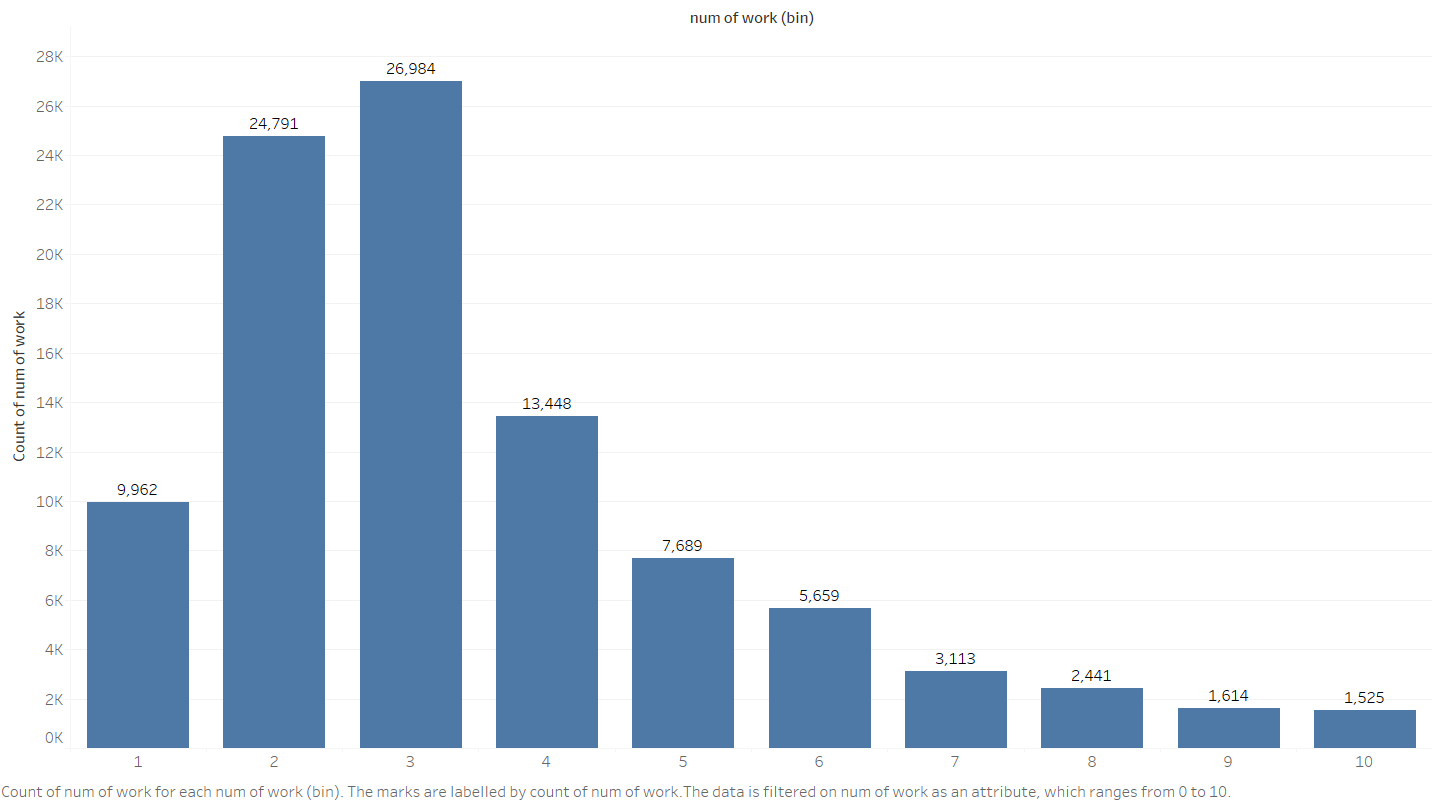

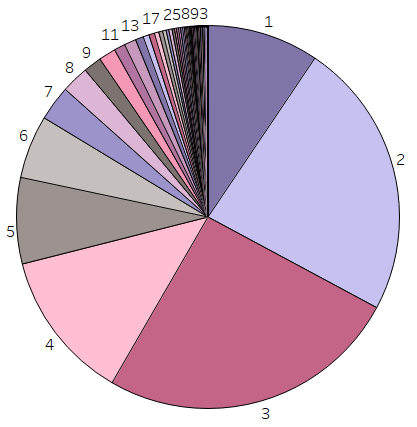

In [34]:
series.unpersist()
numOfWorks.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res23: series.type = MapPartitionsRDD[17] at map at <console>:25
res24: numOfWorks.type = MapPartitionsRDD[71] at distinct at <console>:26


### Autori
Analizziamo adesso il dataset riferito agli autori.

In [35]:
val authors = parsedAuthors.cache()
val authorsCount = authors.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

authors: parsedAuthors.type = MapPartitionsRDD[20] at map at <console>:25
authorsCount: Long = 826351


In totale su Goodreads sono presenti `826351` autori.

#### Rating medio di un autore

In [36]:
val authorRatings = authors.map(a => (a.name, a.averageRating, a.ratingsCount)).cache()
authorRatings.toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/authorRatings")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

authorRatings: org.apache.spark.rdd.RDD[(String, Double, Long)] = MapPartitionsRDD[77] at map at <console>:25


In [37]:
val avgRate = authorRatings.
  map(a => (a._1, a._2)).
  reduce((a, b) => ("total rating", a._2 + b._2))._2 / authorsCount.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

avgRate: Double = 3.8453744595213415


Ignorando il numero di ratings ottenuti, un autore su Goodreads ha in media un voto pari a `3.84`. Anche se molti autori hanno un rating compreso tra il `3.5` e il `4.0`, vediamo dal grafico che ben 28.200 autori hanno ottenuto un rating medio pari a 5; se però osserviamo meglio i dati su Tableau ed effettuiamo una veloce query, molti di questi autori hanno ricevuto 10 ratings o anche di meno, con una media pari a `2.4` ratings.

Un discorso analogo può essere fatto anche con gli autori che hanno avuto un ratings pari o minore a `2.0`.

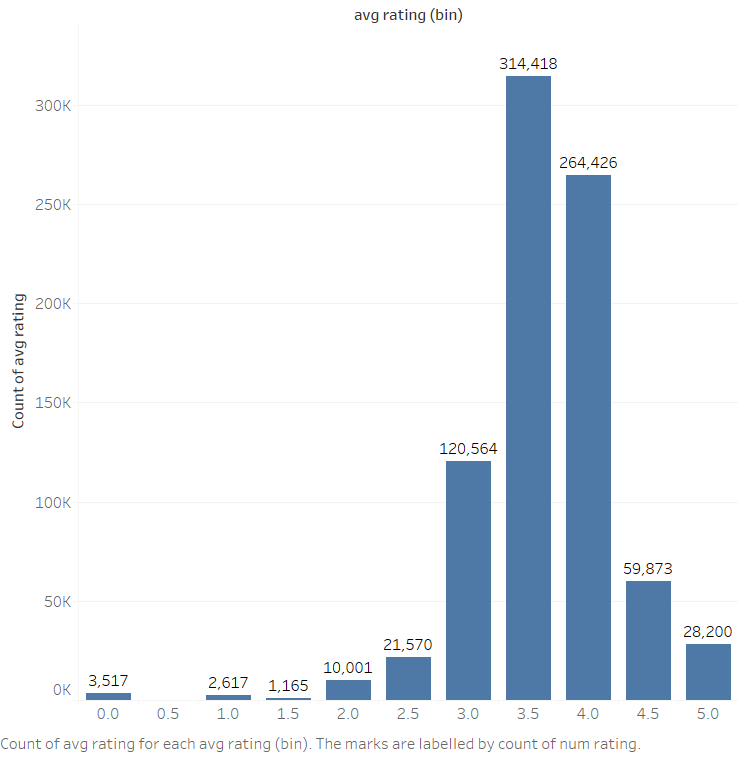

In [38]:
val authorRatingsIsFive = authorRatings.filter(_._2 == 5.0).map(a => (a._1, a._3))
val authorRatingsIsFiveCount = authorRatingsIsFive.count()
val avgRatingReceived = authorRatingsIsFive.reduce((a, b) => ("total rating", a._2 + b._2))._2/authorRatingsIsFiveCount.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

authorRatingsIsFive: org.apache.spark.rdd.RDD[(String, Long)] = MapPartitionsRDD[83] at map at <console>:25
authorRatingsIsFiveCount: Long = 28200
avgRatingReceived: Double = 2.401808510638298


In [39]:
val authorRatingsIsLETwo = authorRatings.filter(_._2 <= 2.0).map(a => (a._1, a._3))
val authorRatingsIsLETwoCount = authorRatingsIsLETwo.count()
val avgRatingCount = authorRatingsIsLETwo.reduce((a, b) => ("total rating", a._2 + b._2))._2 /authorRatingsIsLETwoCount.toDouble

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

authorRatingsIsLETwo: org.apache.spark.rdd.RDD[(String, Long)] = MapPartitionsRDD[85] at map at <console>:25
authorRatingsIsLETwoCount: Long = 13214
avgRatingCount: Double = 2.6669441501437867


#### Autore con il rating migliore

In [40]:
val bestRating = authorRatings.
  map(a => ((a._3, a._2), a._1)).
  sortByKey(false).
  take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bestRating: Array[((Long, Double), String)] = Array(((18532721,4.44),J.K. Rowling), ((10666719,4.01),Stephen King), ((9359797,4.27),Suzanne Collins), ((8965876,3.64),Stephenie Meyer), ((6424927,4.31),J.R.R. Tolkien), ((6191552,4.32),Rick Riordan), ((5535867,4.54),Mary GrandPre), ((5473688,3.79),Dan Brown), ((5280268,4.27),Cassandra Clare), ((5184553,3.86),William Shakespeare))


Ordinando gli autori per il loro numero di ratings ottenuti, l'autore con il rating più alto risulta J.K. Rowling, con un ratings medio pari a `4.44` e 18M di ratings, circa 8M in più rispetto al secondo autore più recensito, Stephen King, con un rating medio di `4.01`.

## Query

Partiamo adesso con l'analisi vera e propria usando il nostro dataset principale. Vogliamo provare a rilevare possibili pattern degli utenti e del sistema di recommendation di Goodreads, cercando di rispondere a domande quali:
- Gli utenti tendono a recensire di più, che comporta uno sforzo maggiore rispetto a cliccare un rating compreso tra 0 e 5 stelle, quando gli è piaciuto il libro (*rating* >= 3) o non gli è piaciuto?
- I libri consigliati da Goordreads (campo `similarBooks`) rispecchiano effettivamente i giudizi dei lettori?

Iniziamo parsando e salvando su memoria, ed eventualmente su disco, il nostro dataset *goodreads_interactions.csv*.

In [187]:
import org.apache.spark.storage.StorageLevel._

sc.getPersistentRDDs.foreach(_._2.unpersist())


val parsedInteractions = interactionsRDD.map(InteractionData(_)).filter(_.isDefined).map(_.get)
val interactions = parsedInteractions.persist(MEMORY_AND_DISK)
interactions.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

import org.apache.spark.storage.StorageLevel._


In [42]:
interactions.map(_.userId).distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res31: Long = 876145


In totale il dataset contiene 228 648 342 records, pari a circa 10GiB, contenente le interazioni di 876145 utenti distinti. Molti dei record nel dataset in realtà hanno il campo `isRead` a 0, ovvero l'utente in questione non ha letto il libro specificato. Per le query future, useremo quindi un dataset filtrato.

In [43]:
interactions.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res32: interactions.type = MapPartitionsRDD[92] at map at <console>:31


In [188]:
val readInteractions = parsedInteractions.filter(_.isRead == 1).persist(MEMORY_AND_DISK)
readInteractions.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

readInteractions: org.apache.spark.rdd.RDD[InteractionData] = MapPartitionsRDD[455] at filter at <console>:40
res302: Long = 112131203


In [45]:
val usersCount = readInteractions.map(_.userId).distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

usersCount: Long = 836433


Il dataset finale contiene 112 131 203 record, pari a 5.4 GiB, contenente le interazioni di 836433 utenti distinti.

### Tendenza a lasciare una recensione

In [46]:
val reviewsByRating = readInteractions.
  map(i => (i.rating, i.isReviewed)).
  aggregateByKey((0.0, 0.0))((a, v) => (a._1+v, a._2 +1), (a1, a2) => (a1._1+a2._1, a1._2+a2._2)).
  map(r => (r._1, r._2._1, r._2._2))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

reviewsByRating: org.apache.spark.rdd.RDD[(Int, Double, Double)] = MapPartitionsRDD[104] at map at <console>:31


In [47]:
//execution time: 6s
reviewsByRating.
  toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/reviewsByRating")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Da come si vede dalla tabella, notiamo una leggera maggiore tendenza a lasciare una recensione quando il libro non è piaciuto per niente (1 stella). In generale però, considerando il numero totale di letture, la maggior parte degli utenti di Goodreads non scrivono recensioni indipendentemente da quanto il libro sia piaciuto. 

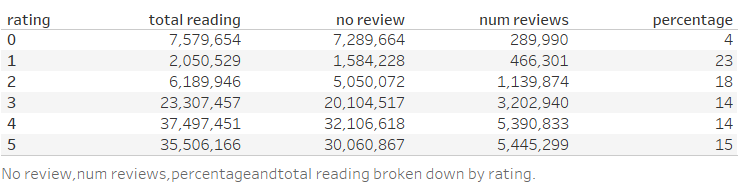

Da qui, proviamo a vedere se esistono utenti che tendono a lasciare recensioni e utenti che non lasciano mai recensioni.

### Recensionisti

In [48]:
val reviewsPerUser = readInteractions.
  map(r => (r.userId, r.isReviewed)).
  aggregateByKey((0.0, 0.0))((a, v) => (a._1+v, a._2 +1), (a1, a2) => (a1._1+a2._1, a1._2+a2._2)).
  map(r => (r._1, r._2._1/r._2._2*100, r._2._2)).
  cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

reviewsPerUser: org.apache.spark.rdd.RDD[(Long, Double, Double)] = MapPartitionsRDD[110] at map at <console>:31


In [49]:
//execution time: 17s
reviewsPerUser. 
  toDF().coalesce(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/reviewsPerUser")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
val serialReviewerCount = reviewsPerUser.
  filter(r => r._2 >= 70.0).
  count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

serialReviewerCount: Long = 24502


In [51]:
serialReviewerCount/usersCount.toDouble*100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res38: Double = 2.929344012012917


Quest'ultima query conferma che la maggior parte degli utenti di Goodreads non lasciano recensioni. Le persone che hanno recensito almeno il 70% delle loro letture sono a malapena il 3% su `836433` utenti. Usando Tableau, però, notiamo che in realtà molti degli utenti che hanno sempre recensito hanno letto in realtà un solo libro.

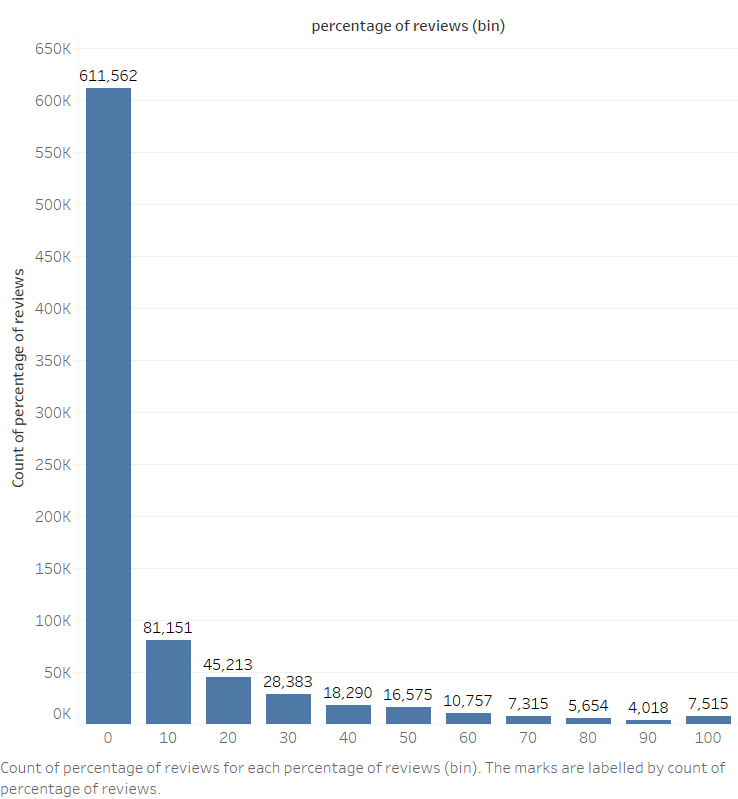

Se prendiamo 100 letture come un numero arbitrario ma sufficiente per identificare gli utenti che hanno usato Goodreads per una certa continuità, allora gli utenti attivi sono 300k e i "virtuosi" che hanno sempre lasciato una recensione sono 104.

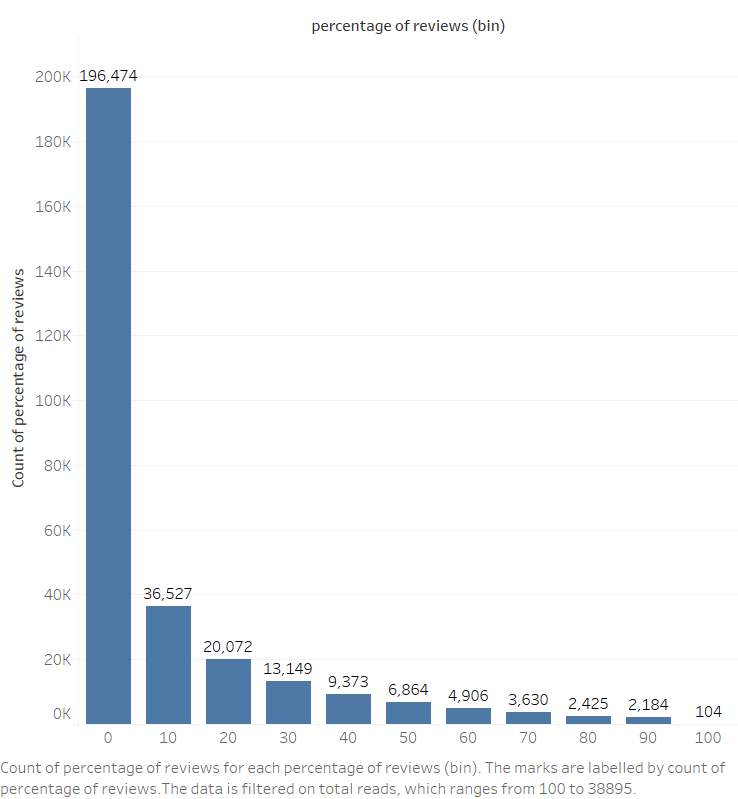

In [52]:
val activeUsers = reviewsPerUser.filter(_._3 >= 100)
val noReviewerCount = activeUsers.
  filter(r => r._2 >= 0.0 && r._2 < 1.0).
  count()
val activeUsersCount = activeUsers.count()
noReviewerCount/activeUsersCount.toDouble*100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

activeUsers: org.apache.spark.rdd.RDD[(Long, Double, Double)] = MapPartitionsRDD[115] at filter at <console>:28
noReviewerCount: Long = 97317
activeUsersCount: Long = 295708
res39: Double = 32.90982996740027


In [53]:
val lowReviewerCount = activeUsers.
  filter(r => r._2 >= 0.0 && r._2 < 4.0).
  count()
lowReviewerCount/activeUsersCount.toDouble*100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

lowReviewerCount: Long = 150370
res40: Double = 50.850839341512575


Possiamo quindi dire che la maggior parte degli utenti non scrive recensioni, uno degli aspetti *social* del sito, ma usa Goodreads principalmente come tools di tracking dei libri letti in quanto segna che il libro è stato letto.
- 1 utente su 3 ha recensito tra lo 0% e l'1% delle proprio letture: 97k su 300k utenti attivi (33%).
- 1 utente su 2 ha recensito tra lo 0% e il 4% delle proprio lettura: 150k su 300k utenti (50%).

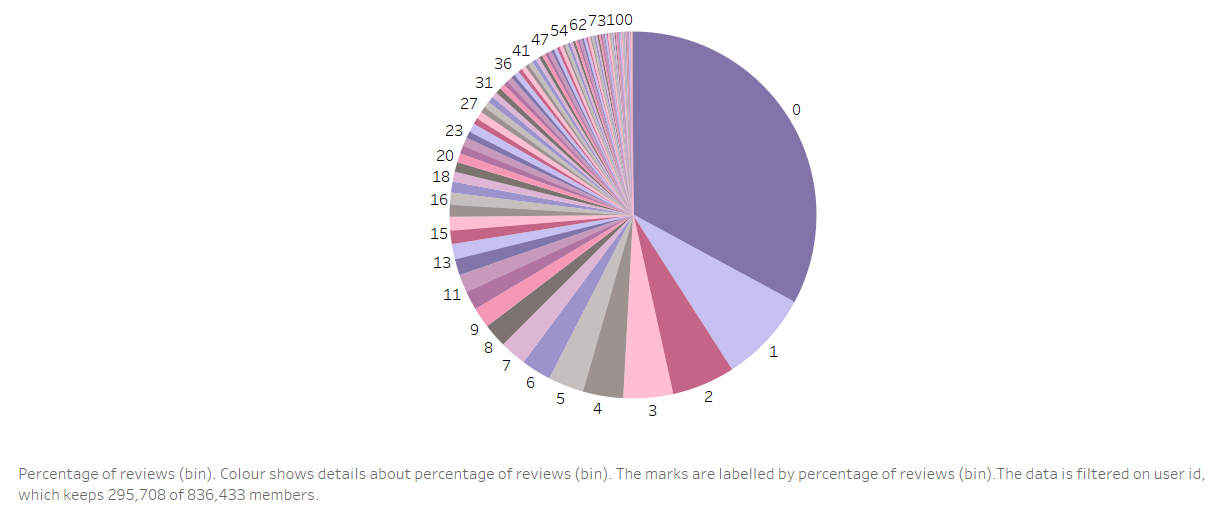

In [54]:
reviewsPerUser.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res41: reviewsPerUser.type = MapPartitionsRDD[110] at map at <console>:31


### Goodreads recommendation

Vogliamo analizzare la bontà del sistema di recommendation di Goodreads, ovvero vedere qual è la differenza di rating tra un libro letto *x* e il libro *y* raccomandato da Goodreads.

Partiamo dal crearci un dataset contenente tutti i dati necessari per effettuare questa query:
- l'id dell'utente
- l'id del libro letto
- rating del libro letto
- lista dei libri raccomandati (in formato stringa "*id1; id2;...*")

Considerando che la media totale del rating dei libri è pari a 3.84, prenderemo in considerazione soli i libri letti che hanno ottenuto un rating pari tre o superiore.

Considerazioni:
- poiché *parsedBookIdMap* è un dataset molto semplice, mentre da *books* necessitiamo solo dei campi `workId`, `similarBooks`, e considerando che entrambi hanno una dimensione nettamente inferiore rispetto a *readInteractions*, creiamo due variabili broadcast;
- poiché Goodreads per ogni libro raccomanda fino a 30 libri, per mitigare l'esplosione di dimensioni che si avrebbe se accopiassimo ogni libro al ogni suo libro raccomandato, si è scelto di usare libri che hanno ricevuto almeno 1M di ratings e solo i primi 5 libri simili;
- prendiamo da *readInteractions* solo i campi d'interesse.

#### Variabili broadcast

In [15]:
// broadcast variables for parsedBookIdMap
// (bookIdInteraction -> books.bookId)

// execution time: 4s
val bookIdMapVar = sc.broadcast(parsedBookIdMap.map(b => (b.bookIdInteraction, b.bookId)).collectAsMap)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bookIdMapVar: org.apache.spark.broadcast.Broadcast[scala.collection.Map[Long,Long]] = Broadcast(9)


Il tempo di esecuzione di *similarBooksVar* è di circa 30s.

Poiché *similarBooksVar* usa `workId`, mentre *readInteractions* usa un `bookId` proprio diverso da quello usato in *books*, si mappa il `bookId` di *readInteractions* ai `workId` di *similarBooksVar*.

Il risultato di un'operazione di *flatMap* è solitamente un RDD con un numero maggiore di righe ma con lo stesso numero di partizioni, con la possibilità di avere partizioni con troppi record rispetto ad altri. D'altra parte, eseguire un'operazione di *filter* riduce il numero di records, con il rischio che alcune partizioni siano vuote e che quindi usino risorse inutilmente. Ripartizionare l'RDD può quindi migliorare le performance. In questo caso però, ripartizionare il dataset non ha avuto effetti significativi sul tempo di esecuzione.

In [16]:
//broadcast variables for mapping (bookId -> WorkId)
val bookIdToWorkId = sc.broadcast(books.map(b => (b.bookId, b.workId)).collectAsMap)

//broadcast variables (workId -> recommendedWorkId)
val similarBooksVar = sc.broadcast(
  books.
  filter(b => b.similarBooks.isDefined && b.similarBooks.get != "" && b.ratingsCount >= 1000000).
  map(b => (b.workId, b.similarBooks.get)).
  flatMap(x => {
    val array = x._2.split(";")
    for (n <- 0 to 4) yield {
      val similarWorkId:Long = bookIdToWorkId.value.get(array(n).toLong).get
      val workId:Long = x._1  

      (workId, similarWorkId)
    } 
  }).    
  distinct().
  collect() 
  )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bookIdToWorkId: org.apache.spark.broadcast.Broadcast[scala.collection.Map[Long,Long]] = Broadcast(11)
similarBooksVar: org.apache.spark.broadcast.Broadcast[Array[(Long, Long)]] = Broadcast(14)


In [59]:
similarBooksVar.value.length

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res50: Int = 270


#### Costruzione dell'RDD userReadBooks

In [189]:
// ((userId, workId) -> rating1)
val userReadBooks = readInteractions.
  map(r => ((r.userId, bookIdToWorkId.value.get(bookIdMapVar.value.get(r.bookId).get)), r.rating)).
  filter(r => r._1._2.isDefined && r._2 > 0).
  map({case (k,v) => ((k._1, k._2.get), v)}).
  persist(DISK_ONLY)

userReadBooks.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

userReadBooks: org.apache.spark.rdd.RDD[((Long, Long), Int)] = MapPartitionsRDD[458] at map at <console>:46
res305: Long = 104543831


In [184]:
readInteractions.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res292: readInteractions.type = MapPartitionsRDD[435] at filter at <console>:37


Poiché *readInteractions* è ancora in cache, il tempo di esecuzione è di soli 46s.

#### Costruzione dell'RDD similarBooksRating

Dopo aver creato *userReadBooks*, un RDD che mappa dalla tupla (*userId*, *workId*) al *rating*, ricaviamo un dataset contenente solo le coppie distinte di libri letti simili tra di loro:
1. attraverso la variabile broadcast *similarBooksVar*, per ogni record di *userReadBooks* prendiamo solo i libri `bookId1`che hanno un corrispondente libro `bookId2` raccomandato e un `rating1` maggiore o uguale a 3;
2. poiché si conosce solo `rating1` si effettua una join con *userReadBooks* per ottenere `rating2`;
3. infine si calcola la differenza tra `rating2` e `rating1`.

La differenza tra i rating avrà un valore:
- uguale a 0, se l'utente ha dato lo stesso giudizio a entrambi i libri;
- positivo, se all'utente è piaciuto di più il libro raccomandato;
- negativo, se all'utente è piaciuti di meno il libro raccomandato.

Da queste differenze, ricaveremo un valore che indichi la bontà del sistema di recommendation di Goodreads.

In [185]:
val similarBooksRating = userReadBooks.
  flatMap({case (k, v) => {
    val similarBooks = similarBooksVar.value.filter(x => x._1 == k._2)
      if (!similarBooks.isEmpty) {
        for (n <- 0 to similarBooks.size-1) yield {
          ((k._1, Option(similarBooks(n)._2)),
          (k._2, v))
        } 
      } else None
  }}).
  filter(x => x._1._2.isDefined && x._2._2 >= 3). //( (userId, bookId2), (bookId1, rating1))
  //coalesce(108). //3.6m
  //coalesce(102). //3.7m
  map({case (k,v) => ((k._1, k._2.get), v)}).
  join(userReadBooks).// ((userId, bookId2), ((bookId1, rating1), rating2))
  map({case (k,v) =>
     val rating1 = v._1._2
     val rating2 = v._2
     ((k._2, v._1._1, rating2, rating1), rating2 - rating1)
   }). // ((bookId2, bookId1, rating2, rating1), difference)
  cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

similarBooksRating: org.apache.spark.rdd.RDD[((Long, Long, Int, Int), Int)] = MapPartitionsRDD[453] at map at <console>:53


In [186]:
similarBooksRating.
  map(x => if (x._2 > 0) (x._1, 1) else if (x._2 < 0) (x._1, - 1) else (x._1, 0)).
  aggregate(0.0)((a, v) => v._2 + a, (a1, a2) => a1 + a2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res293: Double = -193431.0


In [172]:
userReadBooks.unpersist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res263: similarBooksRating.type = MapPartitionsRDD[415] at map at <console>:47


Originariamente le query per calcolare *userReadBooks*, *similarBooksRating* e l'aggregazione di quest'ultima erano state eseguite tutte in una volta, senza effettuare altre azioni oltre all'ultima aggregazione, risultando in un tempo di esecuzione pari a 5.6 minuti.

Considerando la dimensione delle query, salvare prima *userReadBooks* e poi eseguire la seconda query ha permesso di diminuire leggermente il tempo di esecuzione: 46s (*userReadBooks*) + 3.6 min (*similarBooksRating*). Eventuali ripartizioni con *coalesce* non hanno migliorato le performance. 

#### Analisi

In [64]:
val bookTitles = sc.broadcast(books.map(b => (b.workId, b.title)).collectAsMap)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

bookTitles: org.apache.spark.broadcast.Broadcast[scala.collection.Map[Long,String]] = Broadcast(74)


In [65]:
similarBooksRating.
  map({case (k,v) => 
      val title1 = bookTitles.value.get(k._1).get.replace("\"", "").replace(", #", " #").replace("\\\"", "")
      val title2 = bookTitles.value.get(k._2).get.replace("\"", "").replace(", #", " #").replace("\\\"", "")
      (title1, title2, v)
  }).
  toDF().repartition(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/ratingDifferencePerBooks")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
val ratingsCount = similarBooksRating.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ratingsCount: Long = 1038092


In [105]:
similarBooksRating.
  map({case (k,v) => (v, k)}).
  aggregateByKey(0.0)((a, v) => a + 1, (a1, a2) => a1 + a2).
  map(x => (x._1, x._2/ratingsCount*100)).
  collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res158: Array[(Int, Double)] = Array((0,43.31880026047787), (1,15.27186415076891), (2,3.7520759239065518), (-4,0.47847396955183163), (-3,1.914762853388717), (-2,9.377974206525048), (-1,25.886048635381066))


Complessivamente il sistema di Goodreads ottiene un punteggio pari a -193431.0, ovvero per ogni libro e il suo raccomandato, il libro raccomandato tende ad avere un rating minore rispetto al primo. Questo è un punteggio tutto sommato buono, in quanto in tutto sono stati considerati `1038092` coppie di libri.

Infatti, molti delle coppie prese in considerazione hanno una differenza pari a 0 o pari a 1. Come si vede dal grafico:
- il 60% delle coppie ha una differenza di rating positiva, ovvero il libro raccomandato è piaciuto quanto o di più rispetto al primo;
- 1 coppia su 4 ha una differenza di rating pari a 1;
- 1 coppia su 10 ha una differenza di rating pari o minore a -2.

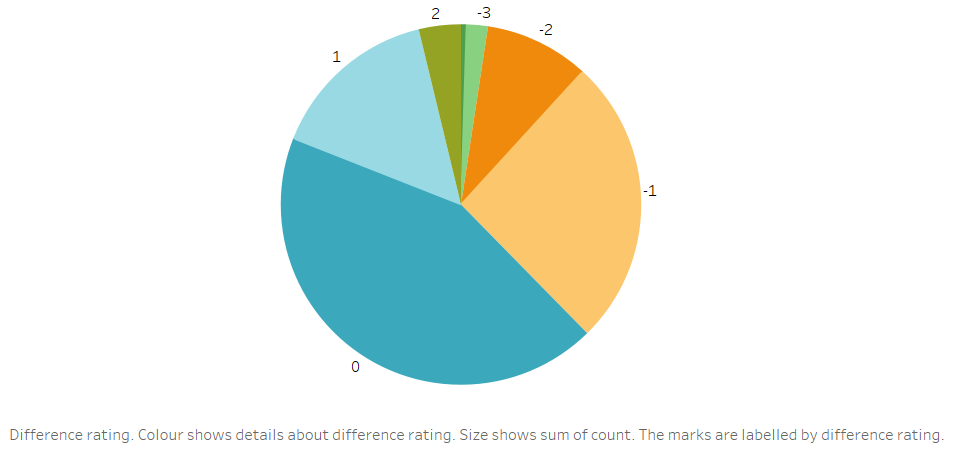

Per effettuare un'analisi ancora più dettagliata, in quanto abbiamo considerato qualunque libro con rating pari o maggiore a 3, analizziamo i libri rating per rating. Infatti, un libro da 3 stelle il cui libro raccomandato ha ottenuto un rating pari a 2 è diverso da un libro da 5 stelle il cui libro raccomandato ha ottenuto un rating pari a 4.

In [68]:
similarBooksRating. // ((bookId2, bookId1, rating2, rating1), difference)
  map({case (k, v) => if (v > 0) (k._4, 1) else if (v < 0) (k._4, - 1) else (k._4, 0)}).
  aggregateByKey((0.0, 0.0))((a, v) => (a._1 + v, a._2 + 1), (a1, a2) => (a1._1 + a2._1, a1._2 + a2._2)).
  collect()    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

res59: Array[(Int, (Double, Double))] = Array((3,(83359.0,164646.0)), (4,(2356.0,336054.0)), (5,(-279146.0,537392.0)))


Otteniamo che:
- per i libri con rating pari a 3, i libri raccomandati corrispondenti (160k) hanno ottenuto un punteggio positivo, ovvero i libri raccomandati con rating positivo o uguale quelli con rating negativi;
- per i libri con rating pari a 4, i libri raccomandati corrispondenti (330k) hanno ottenuto un punteggio positivo ma più basso, in quanto il punteggio aumenterebbe solo se il libro raccomandato ottiene un rating pari a 5. Senza ulteriori dettagli, possiamo comunque affermare che i libri raccomandati hanno ottenuto in linea generale dei rating positivi.
- per i libri con rating pari a 5, i libri raccomandati corrispondenti (530k) hanno ottenuto un punteggio negativo. In un caso come questo, il punteggio non potrebbe mai aumentare, ma solo diminuire. Considerando che il punteggio è comunque minore al numero totale di libri considerati, i libri raccomandati hanno probabilmente ottenuto comunque un rating medio-positivo.

In [69]:
similarBooksRating. // ((bookId2, bookId1, rating2, rating1), difference)
  map({case (k, v) => ((k._4, v), 1)}).
  aggregateByKey((0.0))((a, v) => a + 1, (a1, a2) => a1 + a2).
  map({case (k, v) => (k._1, k._2, v)}).
  toDF().repartition(1).write.format("csv").mode(SaveMode.Overwrite).save(s"$path/ratingDifferencePerRatings")    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Per i libri da 3 stelle, gli utenti hanno giudicato i libri raccomandati da Goodreads in modo tutto sommato positivo.
- il 29.9% dei libri raccomandati ha ottenuto lo stesso rating pari a 3;
- il 60.4% dei libri raccomandati ha ottenuto un rating maggiore;
- il restante 9.7% dei libri raccomandati ha ottenuto un rating minore, ovvero 2 o 1 stella.

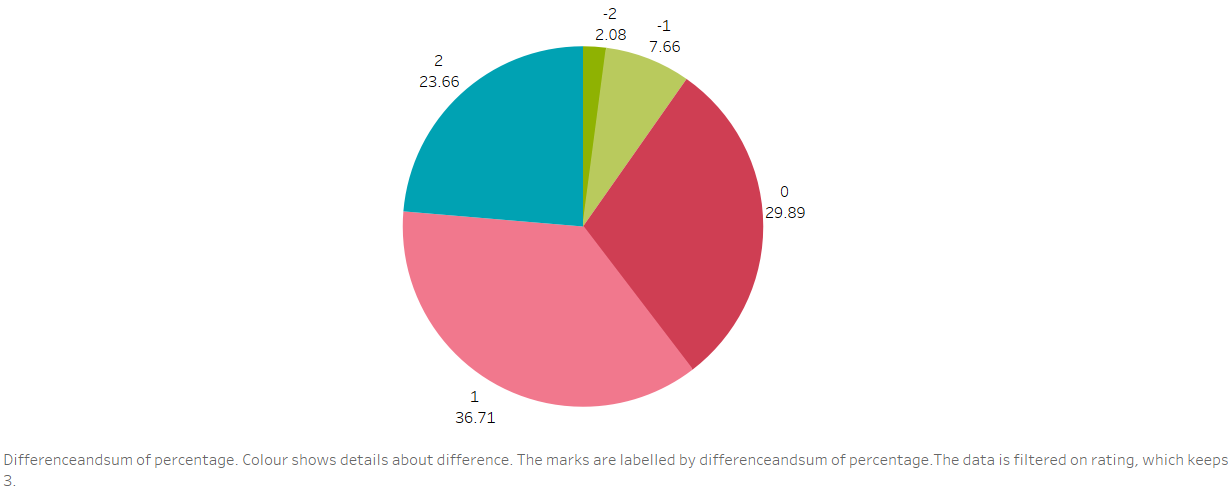

Per i libri da 4 stelle, gli utenti hanno giudicato i libri raccomandati da Goodreads molto positivamente.
- il 71.4% dei libri raccomandati ha ottenuto un rating pari a 4 o 5;
- il 22.7% dei libri raccomandati ha ottenuto un rating pari a 3;
- il restante 5.8% dei libri raccomandati ha ottenuto un rating minore, ovvero 2 o 1 stella.

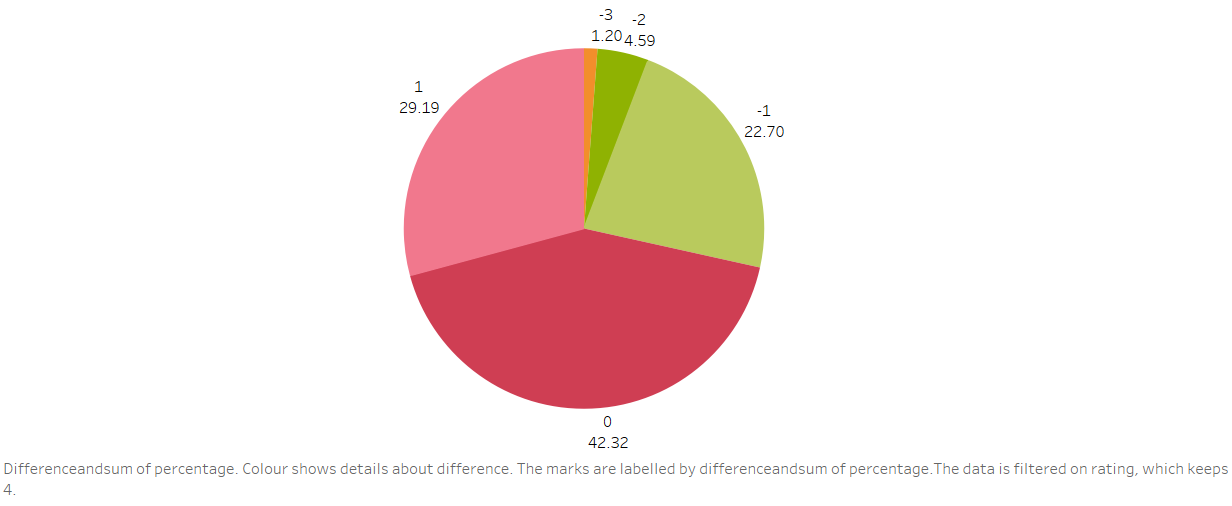

Anche per i libri da 5 stelle, gli utenti hanno giudicato i libri raccomandati da Goodreads molto positivamente.
- l'81.5% dei libri raccomandati ha ottenuto un rating pari a 5 o 4 stelle;
- il restante 18.5% dei libri raccomandati ha ottenuto un rating minore a 4.

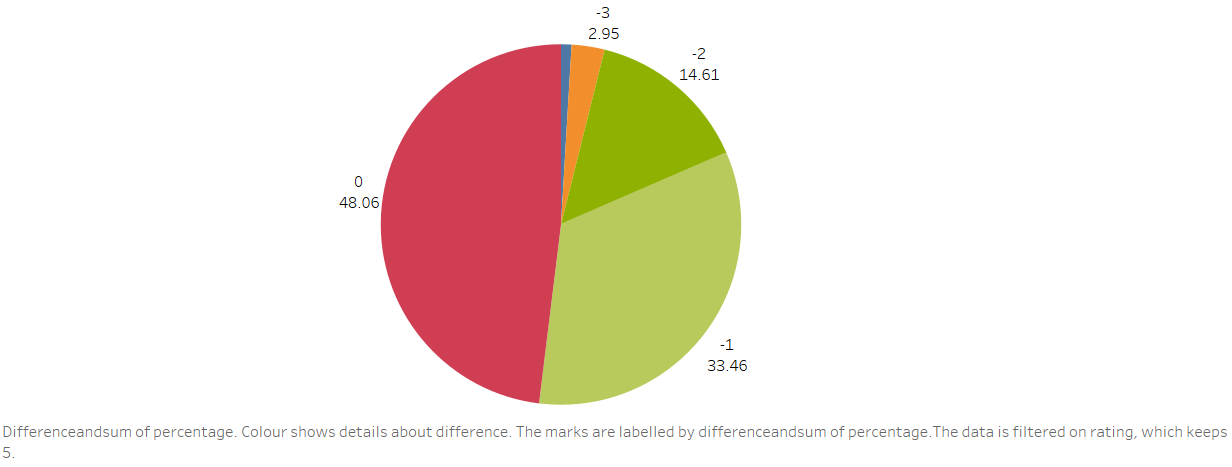

## Conclusioni

A causa della dispersione dei dati, divisi in vari dataset di piccole dimensioni, la maggior parte delle query svolte hanno avuto tempi d'esecuzione molto brevi. La query più complessa, che ha permesso di costruire il dataset contenente la coppia di libro con un rating maggiore di 3 e il suo corrispondente libro raccomandato, ha ottenuto un tempo di esecuzione pari a più di 4 minuti.